<a href="https://colab.research.google.com/github/Rajiv-Chaurasiya/hand-sign-A-to-Z--classification/blob/main/hand_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajiv84ia","key":"7aedcb89b9a50144509d8adaf345de9f"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir h_sign_dataset
%cd h_sign_dataset

/content/h_sign_dataset


In [ ]:
!kaggle datasets list -s american-sign-language

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ayuraj/asl-dataset                                         American Sign Language Dataset                     57MB  2019-04-28 08:25:27           5702         86  0.75             
kapillondhe/american-sign-language                         American Sign Language                              5GB  2021-05-02 13:56:52           1722         28  0.75             
risangbaskoro/wlasl-processed                              WLASL (World Level American Sign Language) Video    5GB  2021-09-20 11:45:56           3681         60  0.9375           
grassknoted/asl-alphabet                                   ASL Alphabet                        

In [ ]:
!mkdir rajiv

In [ ]:
!kaggle datasets download -d kapillondhe/american-sign-language

100% 4.62G/4.64G [00:52<00:00, 135MB/s]
100% 4.64G/4.64G [00:52<00:00, 94.2MB/s]


In [ ]:
!unzip /content/h_sign_dataset/american-sign-language.zip -d h_sign_dataset
!rm h_sign_dataset/american-sign-language.zip

Streaming output truncated to the last 5000 lines.
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1898.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1899.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/19.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/190.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1900.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1901.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1902.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1903.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1904.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1905.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1906.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1907.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1908.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1909.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/191.jpg  
  inflating: h_sign_dataset/ASL_Dataset/Train/Z/1910.jpg  
  inflati

In [ ]:
from PIL import Image
import os
import random

input_folder = '/content/h_sign_dataset/h_sign_dataset/ASL_Dataset/Test/D'
output_folder = '/content/h_sign_dataset/rajiv/Test'
num_files_to_convert = 380

os.makedirs(output_folder, exist_ok=True)

jpg_files = [file for file in os.listdir(input_folder) if file.endswith('.jpg')]

random.shuffle(jpg_files)

for filename in jpg_files[:num_files_to_convert]:
    image = Image.open(os.path.join(input_folder, filename))
    png_filename = os.path.splitext(filename)[0] + '.png'
    image.save(os.path.join(output_folder, png_filename), 'PNG')

print(f"Conversion of {num_files_to_convert} files completed.")


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

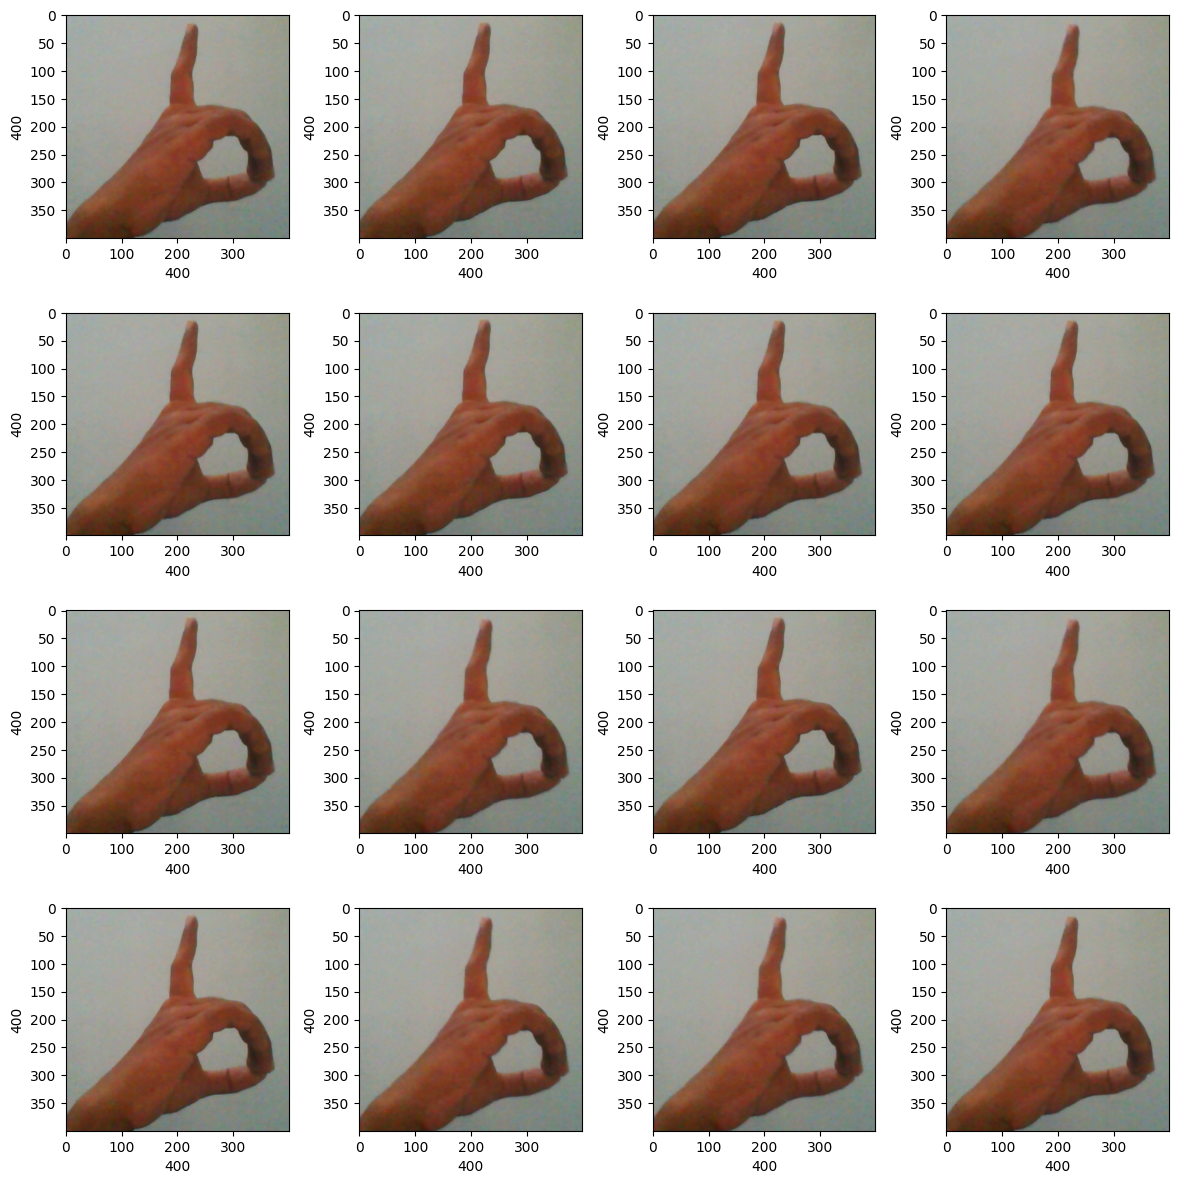

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/h_sign_dataset/rajiv/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
dim1 = []
dim2 = []

for i in range(0,27):
    labels = '/content/h_sign_dataset/rajiv/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

In [ ]:
from PIL import Image
import os

target_width = 50
target_height = 50

output_directory = '/content/h_sign_dataset/rajiv/Train_resized'
os.makedirs(output_directory, exist_ok=True)

for i in range(27):
    labels = '/content/h_sign_dataset/rajiv/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)

    for x in image_path:
        img = Image.open(labels + '/' + x)

        img = img.resize((target_width, target_height), Image.ANTIALIAS)

        img.save(os.path.join(output_directory, x))

print("Resizing completed.")


<ipython-input-150-a92dc9351762>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((target_width, target_height), Image.ANTIALIAS)


Resizing completed.


In [ ]:
images = []
label_id = []

for i in range(27):
    labels = '/content/h_sign_dataset/rajiv/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)
print(label_id)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(images)

In [ ]:
images = np.array(images)
images = images/255
print(images)

(14245, 50, 50, 3)

In [ ]:
images.shape

In [ ]:
label_id = np.array(label_id)
label_id.shape


(14245,)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [ ]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
90/90 [==============================] - 97s 1s/step - loss: 3.2001 - accuracy: 0.1101 - val_loss: 2.7271 - val_accuracy: 0.2436
Epoch 2/10
90/90 [==============================] - 93s 1s/step - loss: 2.4125 - accuracy: 0.2812 - val_loss: 1.8656 - val_accuracy: 0.5002
Epoch 3/10
90/90 [==============================] - 115s 1s/step - loss: 1.8467 - accuracy: 0.4159 - val_loss: 1.3006 - val_accuracy: 0.6395
Epoch 4/10
90/90 [==============================] - 96s 1s/step - loss: 1.4559 - accuracy: 0.5218 - val_loss: 1.0924 - val_accuracy: 0.6725
Epoch 5/10
90/90 [==============================] - 107s 1s/step - loss: 1.1652 - accuracy: 0.6104 - val_loss: 0.7577 - val_accuracy: 0.7848
Epoch 6/10
90/90 [==============================] - 94s 1s/step - loss: 0.9704 - accuracy: 0.6617 - val_loss: 0.4597 - val_accuracy: 0.8954
Epoch 7/10
90/90 [==============================] - 97s 1s/step - loss: 0.8147 - accuracy: 0.7109 - val_loss: 0.3584 - val_accuracy: 0.9140
Epoch 8/10
90/90 [

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/10
90/90 [==============================] - 89s 980ms/step - loss: 0.5435 - accuracy: 0.8031 - val_loss: 0.1986 - val_accuracy: 0.9596
Epoch 2/10
90/90 [==============================] - 92s 1s/step - loss: 0.4879 - accuracy: 0.8264 - val_loss: 0.1984 - val_accuracy: 0.9473
Epoch 3/10
90/90 [==============================] - 86s 953ms/step - loss: 0.4892 - accuracy: 0.8239 - val_loss: 0.1275 - val_accuracy: 0.9709
Epoch 4/10
90/90 [==============================] - 88s 974ms/step - loss: 0.4065 - accuracy: 0.8544 - val_loss: 0.1051 - val_accuracy: 0.9747
Epoch 5/10
90/90 [==============================] - 89s 991ms/step - loss: 0.3928 - accuracy: 0.8541 - val_loss: 0.1113 - val_accuracy: 0.9733
Epoch 6/10
90/90 [==============================] - 92s 1s/step - loss: 0.3635 - accuracy: 0.8701 - val_loss: 0.0858 - val_accuracy: 0.9832
Epoch 7/10
90/90 [==============================] - 91s 1s/step - loss: 0.3525 - accuracy: 0.8688 - val_loss: 0.0845 - val_accuracy: 0.9803
Epoch 8/

<Axes: >

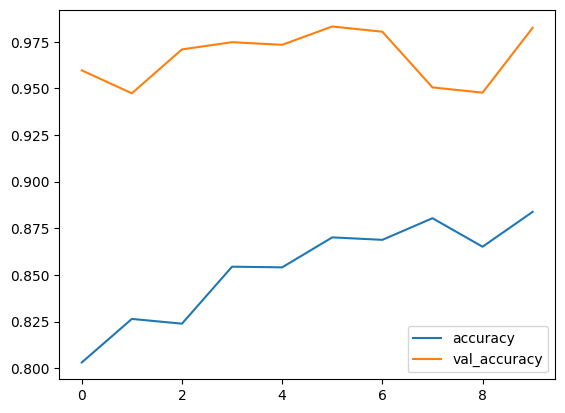

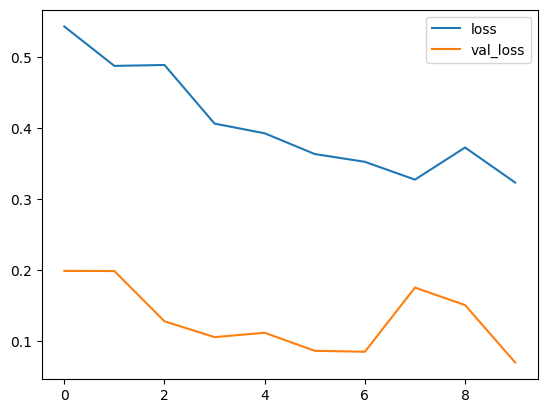

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
all_labels={
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'J', 9: 'K',
    10: 'I', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S',
    19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z',26: 'Nothing',27: 'Space'
}

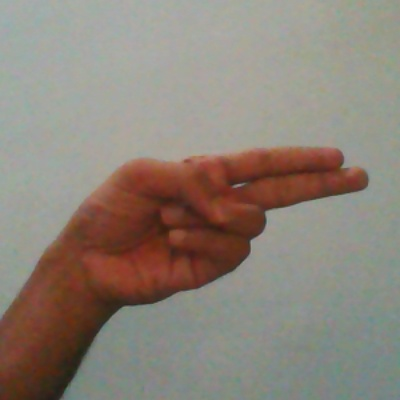

In [ ]:
# Visualize test image
input_image = Image.open('/content/h_sign_dataset/h_sign_dataset/ASL_Dataset/Test/H/3004.jpg')
input_image

In [ ]:
input_image = input_image.resize((50, 50))
input_image = np.array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)
input_image

array([[[[0.64313725, 0.6745098 , 0.65490196],
         [0.65098039, 0.66666667, 0.65882353],
         [0.65490196, 0.67058824, 0.64705882],
         ...,
         [0.58823529, 0.61568627, 0.56078431],
         [0.58823529, 0.60784314, 0.54117647],
         [0.57647059, 0.6       , 0.54117647]],

        [[0.64313725, 0.67058824, 0.65882353],
         [0.65098039, 0.66666667, 0.65882353],
         [0.64705882, 0.66666667, 0.64705882],
         ...,
         [0.6       , 0.61176471, 0.53333333],
         [0.6       , 0.61176471, 0.54901961],
         [0.58823529, 0.59607843, 0.54901961]],

        [[0.61960784, 0.67843137, 0.6745098 ],
         [0.62352941, 0.67058824, 0.6627451 ],
         [0.64313725, 0.66666667, 0.64313725],
         ...,
         [0.6       , 0.60392157, 0.54509804],
         [0.6       , 0.6       , 0.54117647],
         [0.59607843, 0.58431373, 0.55294118]],

        ...,

        [[0.38431373, 0.19607843, 0.14117647],
         [0.35686275, 0.19607843, 0.10980392]

In [ ]:
predictions = model.predict(input_image)


1/1 [==============================] - 0s 27ms/step


In [ ]:
predicted_label = np.argmax(predictions, axis=1)


In [ ]:
predicted_label = all_labels[predicted_label[0]]


In [ ]:
print(f'Predicted Label: {predicted_label}')

Predicted Label: H
